In [142]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv("Data\\US_Regional_Sales_Data.csv")
df


,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,26/9/20,30/12/20,7/1/21,14/1/21,USD,9,41,339,29,1,0.075,121.94,234.5
7987,SO - 0008088,Online,WARE-NMK1003,26/9/20,30/12/20,2/1/21,4/1/21,USD,14,29,202,3,6,0.050,"1,921.56","3,202.60"
7988,SO - 0008089,Online,WARE-UHY1004,26/9/20,30/12/20,23/1/21,26/1/21,USD,14,32,241,35,5,0.200,"2,792.76","3,825.70"
7989,SO - 0008090,Online,WARE-NMK1003,26/9/20,30/12/20,20/1/21,25/1/21,USD,20,42,112,36,8,0.100,804,"1,072.00"


In [143]:
df.isnull().sum() / 100

OrderNumber         0.0
Sales Channel       0.0
WarehouseCode       0.0
ProcuredDate        0.0
OrderDate           0.0
ShipDate            0.0
DeliveryDate        0.0
CurrencyCode        0.0
_SalesTeamID        0.0
_CustomerID         0.0
_StoreID            0.0
_ProductID          0.0
Order Quantity      0.0
Discount Applied    0.0
Unit Cost           0.0
Unit Price          0.0
dtype: float64

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Cost         7991 non-null   object 
 15  Unit Price        7991 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory

In [145]:
df['ProcuredDate'] = pd.to_datetime(df['ProcuredDate'])
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['ShipDate'] = pd.to_datetime(df['ShipDate'])
df['DeliveryDate'] = pd.to_datetime(df['DeliveryDate'])

C:\Users\ahmed\AppData\Local\Temp\ipykernel_21612\3933569299.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ProcuredDate'] = pd.to_datetime(df['ProcuredDate'])
C:\Users\ahmed\AppData\Local\Temp\ipykernel_21612\3933569299.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OrderDate'] = pd.to_datetime(df['OrderDate'])
C:\Users\ahmed\AppData\Local\Temp\ipykernel_21612\3933569299.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ShipDate'] = pd.to_datetime(df['ShipDate'])
C:\Users\ahmed\AppData\Local\Temp\ipykernel_21612\3933569299.py:4: UserWarning: Could n

In [146]:
df['ProcuredYear'] = df['ProcuredDate'].dt.year
df['OrderMonth'] = df['OrderDate'].dt.month
df['OrderDayOfWeek'] = df['OrderDate'].dt.dayofweek
df['OrderYear'] = df['OrderDate'].dt.year


In [147]:
df['Unit Cost'] = df['Unit Cost'].str.replace(',', '', regex=False).astype(float).astype(int)
df['Unit Price'] = df['Unit Price'].str.replace(',', '', regex=False).astype(float).astype(int)

In [148]:
df['Profit Margin'] = (df['Unit Price'] - df['Unit Cost']) / df['Unit Price'] * 100


In [149]:

df['Unit Price Contribution'] = df['Unit Price']
df['Unit Cost Contribution'] = -df['Unit Cost']


In [150]:


# Calculate the total profit
total_profit = df['Profit Margin'].sum()

# Calculate the proportion of profit margin for each product
df['Proportion'] = df['Profit Margin'] / total_profit * 100



In [151]:
df['ProcuredDate'] = pd.to_datetime(df['ProcuredDate'])
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['ShipDate'] = pd.to_datetime(df['ShipDate'])
df['DeliveryDate'] = pd.to_datetime(df['DeliveryDate'])

# Calculate profit margin
df['Profit Margin'] = ((df['Unit Price'] - df['Unit Cost']) / df['Unit Price']) * 100

# Calculate cumulative profit margins over time for each product or category
df['Cumulative Profit Margin'] = df.groupby('Sales Channel')['Profit Margin'].cumsum()



In [152]:
df

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,...,Unit Price,ProcuredYear,OrderMonth,OrderDayOfWeek,OrderYear,Profit Margin,Unit Price Contribution,Unit Cost Contribution,Proportion,Cumulative Profit Margin
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,...,1963,2017,5,3,2018,49.006623,1963,-1001,0.016401,49.006623
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-02-07,USD,14,20,...,3939,2017,5,3,2018,15.003808,3939,-3348,0.005021,15.003808
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-01-07,USD,21,16,...,1775,2017,5,3,2018,56.000000,1775,-781,0.018742,56.000000
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-02-06,2018-07-06,USD,28,48,...,2324,2017,5,3,2018,37.005164,2324,-1464,0.012385,37.005164
4,SO - 000105,Distributor,WARE-NMK1003,2018-10-04,2018-05-31,2018-06-16,2018-06-26,USD,22,49,...,1822,2018,5,3,2018,18.990121,1822,-1476,0.006356,74.990121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,2020-09-26,2020-12-30,2021-07-01,2021-01-14,USD,9,41,...,234,2020,12,2,2020,48.290598,234,-121,0.016162,123032.098137
7987,SO - 0008088,Online,WARE-NMK1003,2020-09-26,2020-12-30,2021-02-01,2021-04-01,USD,14,29,...,3202,2020,12,2,2020,40.006246,3202,-1921,0.013389,90416.499314
7988,SO - 0008089,Online,WARE-UHY1004,2020-09-26,2020-12-30,2021-01-23,2021-01-26,USD,14,32,...,3825,2020,12,2,2020,27.006536,3825,-2792,0.009038,90443.505850
7989,SO - 0008090,Online,WARE-NMK1003,2020-09-26,2020-12-30,2021-01-20,2021-01-25,USD,20,42,...,1072,2020,12,2,2020,25.000000,1072,-804,0.008367,90468.505850


In [153]:
df.drop(columns=['ProcuredYear',
                     'OrderMonth',
                     'OrderDayOfWeek',
                     'OrderYear',
                     'Profit Margin',
                     'Unit Price Contribution',
                    'Unit Cost Contribution',
                     'Proportion',
                     'Cumulative Profit Margin',
                     'WarehouseCode',
                     'ProcuredDate',
                     'OrderDate',
                     'ShipDate',
                     'DeliveryDate',
                     'CurrencyCode',
                     'OrderNumber'],inplace=True)

In [154]:
df

,Sales Channel,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,In-Store,6,15,259,12,5,0.075,1001,1963
1,Online,14,20,196,27,3,0.075,3348,3939
2,Distributor,21,16,213,16,1,0.050,781,1775
3,Wholesale,28,48,107,23,8,0.075,1464,2324
4,Distributor,22,49,111,26,8,0.100,1476,1822
...,...,...,...,...,...,...,...,...,...
7986,In-Store,9,41,339,29,1,0.075,121,234
7987,Online,14,29,202,3,6,0.050,1921,3202
7988,Online,14,32,241,35,5,0.200,2792,3825
7989,Online,20,42,112,36,8,0.100,804,1072


# Feature engineering

In [155]:
df['Discount Percentage'] = (df['Discount Applied'] / df['Unit Price']) * 100
df['Total Revenue'] = (df['Unit Price'] * df['Order Quantity']) * (1 - df['Discount Applied'])
df['Profit'] = df['Total Revenue'] - (df['Unit Cost'] * df['Order Quantity'])


In [156]:
df

,Sales Channel,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Discount Percentage,Total Revenue,Profit
0,In-Store,6,15,259,12,5,0.075,1001,1963,0.003821,9078.875,4073.875
1,Online,14,20,196,27,3,0.075,3348,3939,0.001904,10930.725,886.725
2,Distributor,21,16,213,16,1,0.050,781,1775,0.002817,1686.250,905.250
3,Wholesale,28,48,107,23,8,0.075,1464,2324,0.003227,17197.600,5485.600
4,Distributor,22,49,111,26,8,0.100,1476,1822,0.005488,13118.400,1310.400
...,...,...,...,...,...,...,...,...,...,...,...,...
7986,In-Store,9,41,339,29,1,0.075,121,234,0.032051,216.450,95.450
7987,Online,14,29,202,3,6,0.050,1921,3202,0.001562,18251.400,6725.400
7988,Online,14,32,241,35,5,0.200,2792,3825,0.005229,15300.000,1340.000
7989,Online,20,42,112,36,8,0.100,804,1072,0.009328,7718.400,1286.400


In [157]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["Sales Channel"] = encoder.fit_transform(df["Sales Channel"])

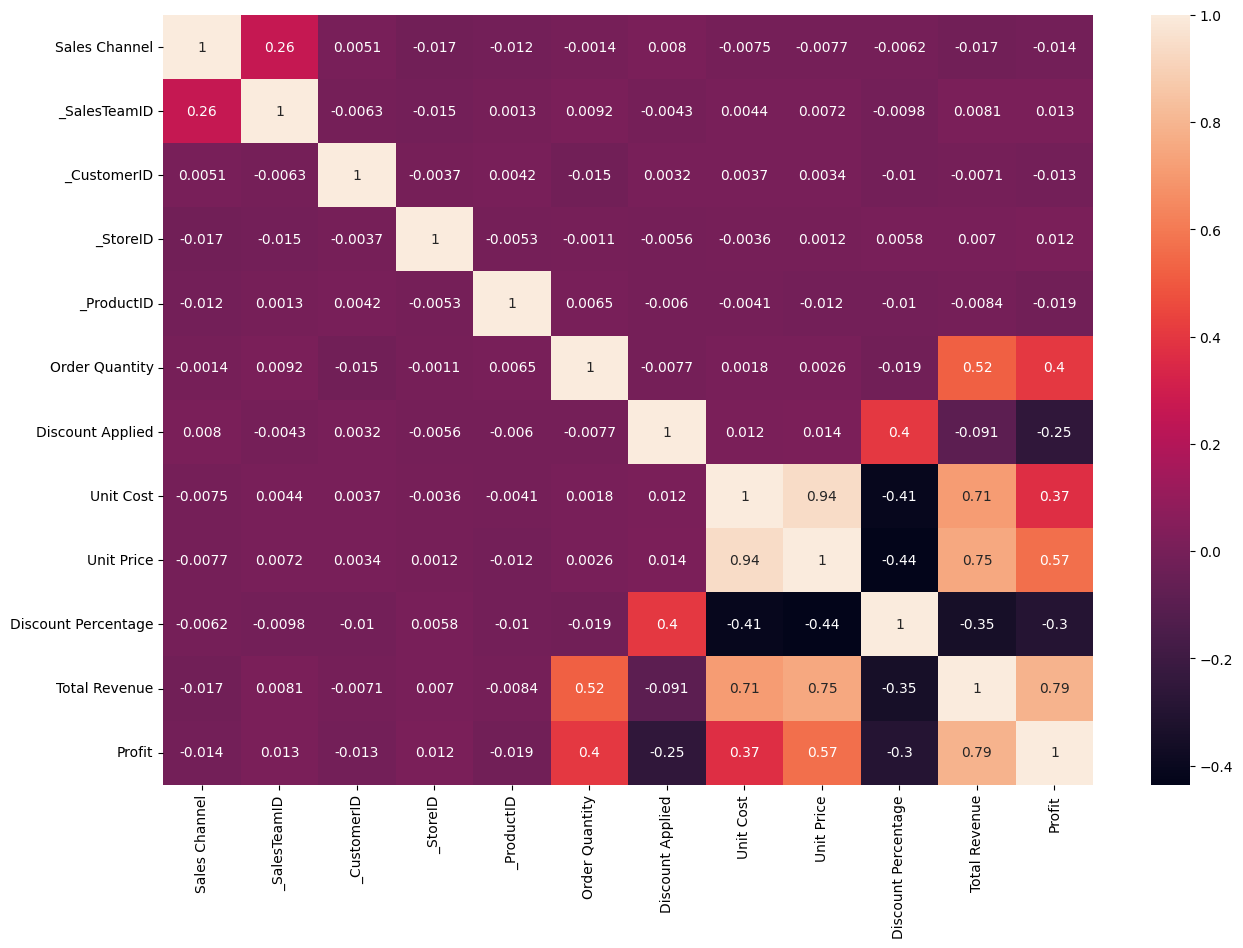

In [158]:
plt.figure(figsize=(15 ,10 ))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [159]:
df

,Sales Channel,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Discount Percentage,Total Revenue,Profit
0,1,6,15,259,12,5,0.075,1001,1963,0.003821,9078.875,4073.875
1,2,14,20,196,27,3,0.075,3348,3939,0.001904,10930.725,886.725
2,0,21,16,213,16,1,0.050,781,1775,0.002817,1686.250,905.250
3,3,28,48,107,23,8,0.075,1464,2324,0.003227,17197.600,5485.600
4,0,22,49,111,26,8,0.100,1476,1822,0.005488,13118.400,1310.400
...,...,...,...,...,...,...,...,...,...,...,...,...
7986,1,9,41,339,29,1,0.075,121,234,0.032051,216.450,95.450
7987,2,14,29,202,3,6,0.050,1921,3202,0.001562,18251.400,6725.400
7988,2,14,32,241,35,5,0.200,2792,3825,0.005229,15300.000,1340.000
7989,2,20,42,112,36,8,0.100,804,1072,0.009328,7718.400,1286.400


In [160]:


df.drop(columns=['_SalesTeamID','_CustomerID','_StoreID','_ProductID'],inplace=True)

In [161]:
df

,Sales Channel,Order Quantity,Discount Applied,Unit Cost,Unit Price,Discount Percentage,Total Revenue,Profit
0,1,5,0.075,1001,1963,0.003821,9078.875,4073.875
1,2,3,0.075,3348,3939,0.001904,10930.725,886.725
2,0,1,0.050,781,1775,0.002817,1686.250,905.250
3,3,8,0.075,1464,2324,0.003227,17197.600,5485.600
4,0,8,0.100,1476,1822,0.005488,13118.400,1310.400
...,...,...,...,...,...,...,...,...
7986,1,1,0.075,121,234,0.032051,216.450,95.450
7987,2,6,0.050,1921,3202,0.001562,18251.400,6725.400
7988,2,5,0.200,2792,3825,0.005229,15300.000,1340.000
7989,2,8,0.100,804,1072,0.009328,7718.400,1286.400


In [162]:
scaling = ["Sales Channel", "Order Quantity", "Discount Applied","Unit Cost", "Unit Price", "Total Revenue"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[scaling] = scaler.fit_transform(df[scaling])

In [163]:
df

,Sales Channel,Order Quantity,Discount Applied,Unit Cost,Unit Price,Discount Percentage,Total Revenue,Profit
0,-0.397639,0.205259,-0.460403,-0.386947,-0.191928,0.003821,-0.008136,4073.875
1,0.722789,-0.659611,-0.460403,1.723026,0.989195,0.001904,0.199469,886.725
2,-1.518068,-1.524481,-0.752579,-0.584729,-0.304302,0.002817,-0.836900,905.250
3,1.843218,1.502564,-0.460403,0.029294,0.023854,0.003227,0.902029,5485.600
4,-1.518068,1.502564,-0.168227,0.040082,-0.276209,0.005488,0.444723,1310.400
...,...,...,...,...,...,...,...,...
7986,-0.397639,-1.524481,-0.460403,-1.178074,-1.225411,0.032051,-1.001674,95.450
7987,0.722789,0.637694,-0.752579,0.440141,0.548664,0.001562,1.020167,6725.400
7988,0.722789,0.205259,1.000477,1.223177,0.921053,0.005229,0.689295,1340.000
7989,0.722789,1.502564,-0.168227,-0.564052,-0.724510,0.009328,-0.160654,1286.400


# Training the model  using different tree algorithms and adaboost and xgboost algorithms

In [135]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Profit'])
y = df['Profit']
X_train , X_test, y_train ,y_test = train_test_split(X, y,test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6392, 7)
(1599, 7)
(6392,)
(1599,)


In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
import xgboost as xgb


class TreeBasedModels:
    def __init__(self, model_type='decision_tree', **kwargs):
        if model_type == 'decision_tree':
            self.model = DecisionTreeRegressor(**kwargs)
        elif model_type == 'random_forest':
            self.model = RandomForestRegressor(**kwargs)
        elif model_type == 'gradient_boosting':
            self.model = GradientBoostingRegressor(**kwargs)
        elif model_type == 'adaboost':
            self.model = AdaBoostRegressor(**kwargs)
        elif model_type == 'xgboost':
            self.model = xgb.XGBRegressor(**kwargs)
        else:
            raise ValueError(f"Invalid model type: {model_type}")

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

In [26]:
random_forest = TreeBasedModels(model_type='random_forest', n_estimators=100, max_depth=10)
decision_trees = TreeBasedModels(model_type='decision_tree', max_depth=10, min_samples_split=2, min_samples_leaf=1)
gradient_boosting = TreeBasedModels(model_type='gradient_boosting', n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2, min_samples_leaf=1)
adaboost_model = TreeBasedModels(model_type='adaboost', n_estimators=50, learning_rate=1.0, estimator=DecisionTreeRegressor(max_depth=3))
xgboost_model = TreeBasedModels(model_type='xgboost', n_estimators=100, learning_rate=0.1, max_depth=3)

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_predictions(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Evaluation for {model_name}:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared: {r2:.4f}\n")

In [36]:
evaluation_results = []

def training(X_train, y_train, X_test, y_test):
    models = {
        "Random Forest": random_forest,
        "Decision Trees": decision_trees,
        "Gradient Boosting": gradient_boosting,
        "adaboost": adaboost_model,
        "xgboost": xgboost_model
    }

    for name, model in models.items():
        model.train(X_train, y_train)
        preds = model.predict(X_test)
        evaluate_predictions(y_test, preds, model_name=name)

def evaluate_predictions(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Evaluation for {model_name}:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared: {r2:.4f}\n")

    evaluation_results.append({
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })


In [37]:
training(X_train, y_train, X_test, y_test)



Evaluation for Random Forest:
Mean Squared Error: 303214.8221
Root Mean Squared Error: 550.6495
Mean Absolute Error: 354.1921
R-squared: 0.9723

Evaluation for Decision Trees:
Mean Squared Error: 880030.5488
Root Mean Squared Error: 938.0994
Mean Absolute Error: 550.9215
R-squared: 0.9197

Evaluation for Gradient Boosting:
Mean Squared Error: 337925.3459
Root Mean Squared Error: 581.3135
Mean Absolute Error: 402.9809
R-squared: 0.9692

Evaluation for adaboost:
Mean Squared Error: 3097631.4546
Root Mean Squared Error: 1760.0089
Mean Absolute Error: 1445.2857
R-squared: 0.7173

Evaluation for xgboost:
Mean Squared Error: 336284.9353
Root Mean Squared Error: 579.9008
Mean Absolute Error: 400.1949
R-squared: 0.9693



### Before Hyperparameter Tuning

C:\Users\DELL\AppData\Local\Temp\ipykernel_13744\3238447442.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
C:\Users\DELL\AppData\Local\Temp\ipykernel_13744\3238447442.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
C:\Users\DELL\AppData\Local\Temp\ipykernel_13744\3238447442.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
C:\U

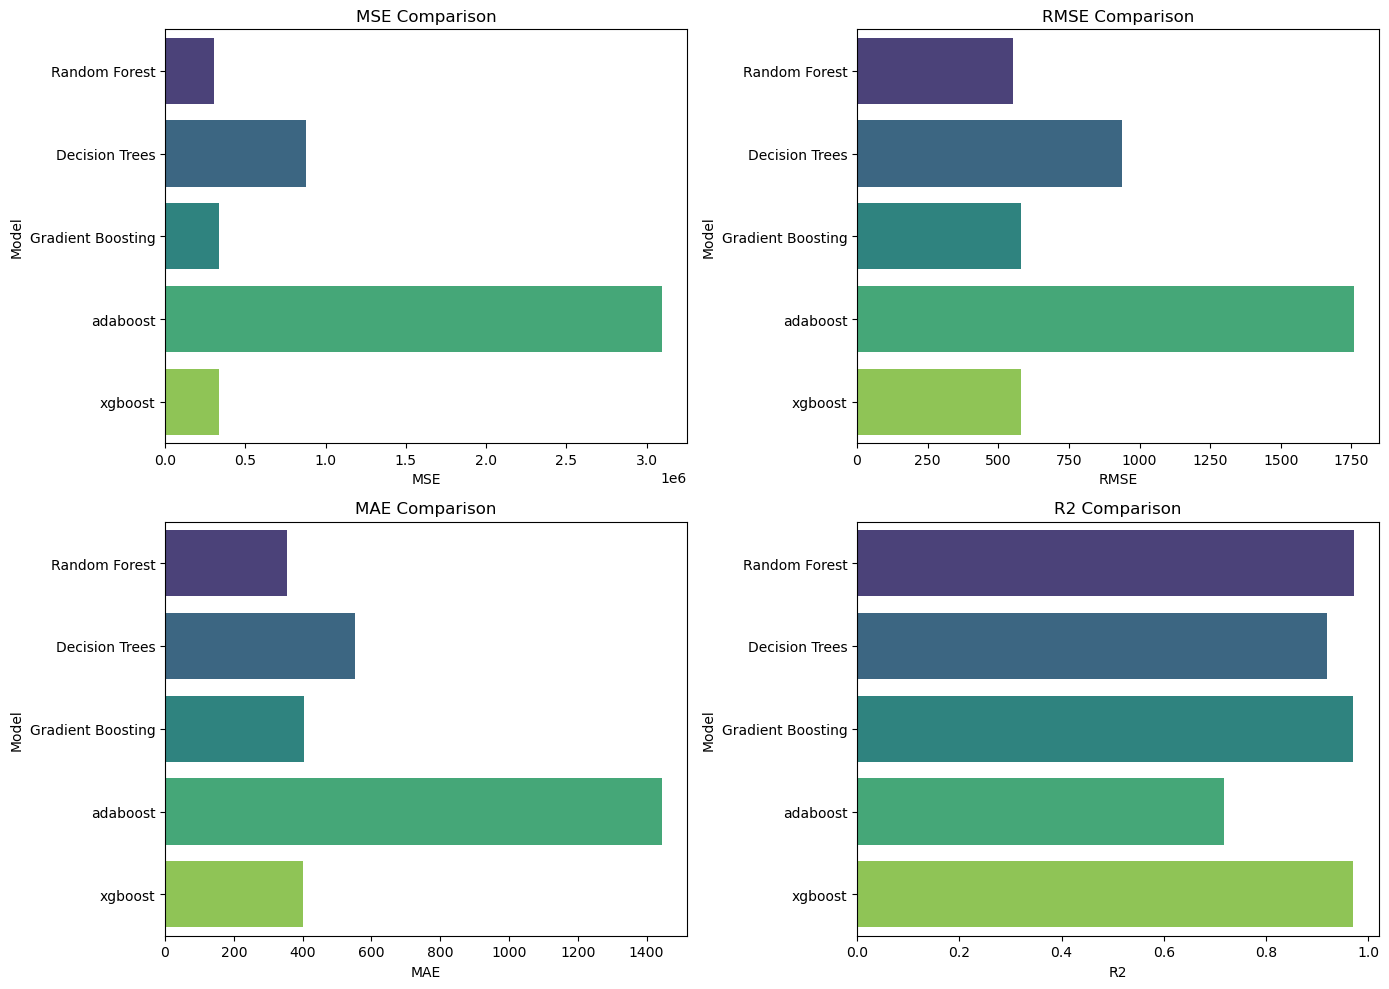

In [38]:
df_results = pd.DataFrame(evaluation_results)

plt.figure(figsize=(14, 10))
metrics = ['MSE', 'RMSE', 'MAE', 'R2']

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
    plt.title(f'{metric} Comparison')
    plt.xlabel(metric)
    plt.ylabel('Model')

plt.tight_layout()
plt.show()


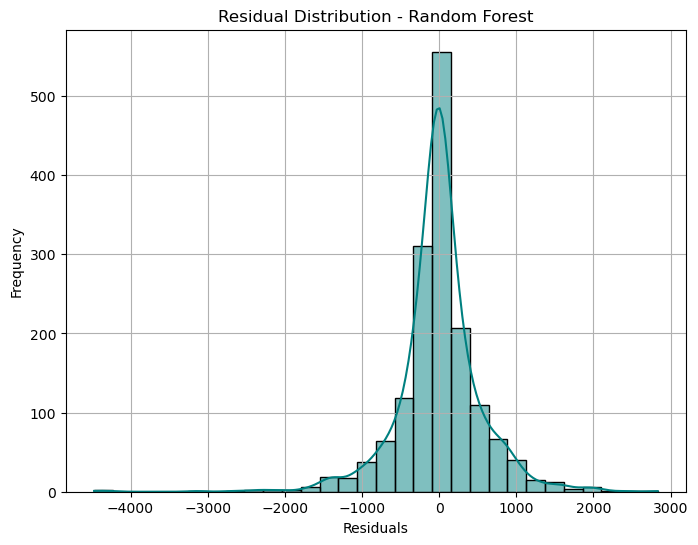

In [39]:
predictions_random = random_forest.predict(X_test)

residuals = y_test - predictions_random

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='teal')
plt.title("Residual Distribution - Random Forest")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


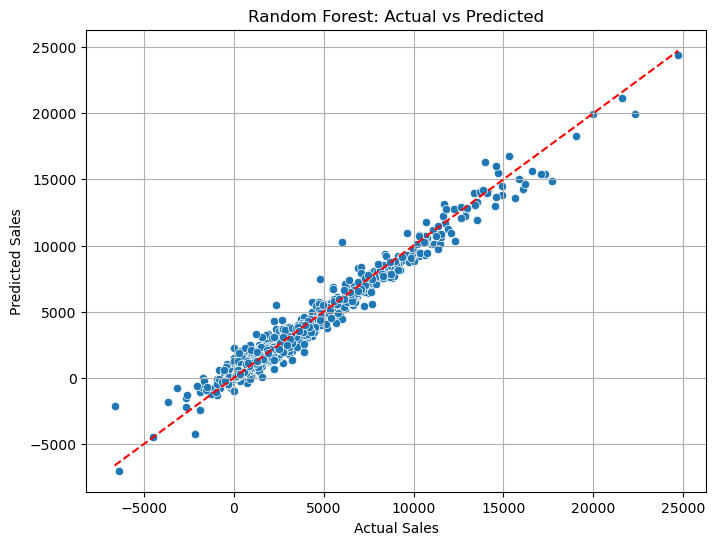

In [40]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions_random)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.grid()
plt.show()


In [41]:
from sklearn.model_selection import GridSearchCV
def tune_model(model_class, param_grid, X_train, y_train):
    base_model = model_class.model
    grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best R2 score: {grid_search.best_score_:.4f}")
    return grid_search.best_estimator_


In [42]:
param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5],
    },
    "Decision Trees": {
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    "adaboost": {
        'n_estimators': [50, 100],
        'learning_rate': [0.5, 1.0]
    },
    "xgboost": {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }
}


In [43]:
tuned_models = {}

for name, model in {
    "Random Forest": random_forest,
    "Decision Trees": decision_trees,
    "Gradient Boosting": gradient_boosting,
    "adaboost": adaboost_model,
    "xgboost": xgboost_model
}.items():
    print(f"Tuning {name}...")
    best_estimator = tune_model(model, param_grids[name], X_train, y_train)
    tuned_models[name] = best_estimator


Tuning Random Forest...
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best R2 score: 0.9791
Tuning Decision Trees...
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best R2 score: 0.9472
Tuning Gradient Boosting...
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best R2 score: 0.9893
Tuning adaboost...
Best parameters: {'learning_rate': 1.0, 'n_estimators': 100}
Best R2 score: 0.7550
Tuning xgboost...
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best R2 score: 0.9895


In [44]:
def training_tuned_models(X_test, y_test):
    for name, model in tuned_models.items():
        preds = model.predict(X_test)
        evaluate_predictions(y_test, preds, model_name=name)


In [45]:
training_tuned_models(X_test, y_test)


Evaluation for Random Forest:
Mean Squared Error: 209040.6844
Root Mean Squared Error: 457.2097
Mean Absolute Error: 241.9476
R-squared: 0.9809

Evaluation for Decision Trees:
Mean Squared Error: 580253.8919
Root Mean Squared Error: 761.7440
Mean Absolute Error: 405.2412
R-squared: 0.9470

Evaluation for Gradient Boosting:
Mean Squared Error: 116016.1166
Root Mean Squared Error: 340.6114
Mean Absolute Error: 192.1249
R-squared: 0.9894

Evaluation for adaboost:
Mean Squared Error: 2896720.2184
Root Mean Squared Error: 1701.9754
Mean Absolute Error: 1377.8015
R-squared: 0.7356

Evaluation for xgboost:
Mean Squared Error: 94829.2825
Root Mean Squared Error: 307.9436
Mean Absolute Error: 184.9837
R-squared: 0.9913



### After Hyperparameter Tuning

In [54]:
# Create evaluation results dictionary
evaluation_results = [
    {'Model': 'Random Forest', 'MSE': 209040.6844, 'RMSE': 457.2097, 'MAE': 241.9476, 'R2': 0.9809},
    {'Model': 'Decision Tree', 'MSE': 580253.8919, 'RMSE': 761.7440, 'MAE': 405.2412, 'R2': 0.9470},
    {'Model': 'Gradient Boosting', 'MSE': 116016.1166, 'RMSE': 340.6114, 'MAE': 192.1249, 'R2': 0.9894},
    {'Model': 'AdaBoost', 'MSE': 2896720.2184, 'RMSE': 1701.9754, 'MAE': 1377.8015, 'R2': 0.7356},
    {'Model': 'XGBoost', 'MSE': 94829.2825, 'RMSE': 307.9436, 'MAE': 184.9837, 'R2': 0.9913}
]

df_results = pd.DataFrame(evaluation_results)


C:\Users\DELL\AppData\Local\Temp\ipykernel_13744\4283742320.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
C:\Users\DELL\AppData\Local\Temp\ipykernel_13744\4283742320.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
C:\Users\DELL\AppData\Local\Temp\ipykernel_13744\4283742320.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
C:\U

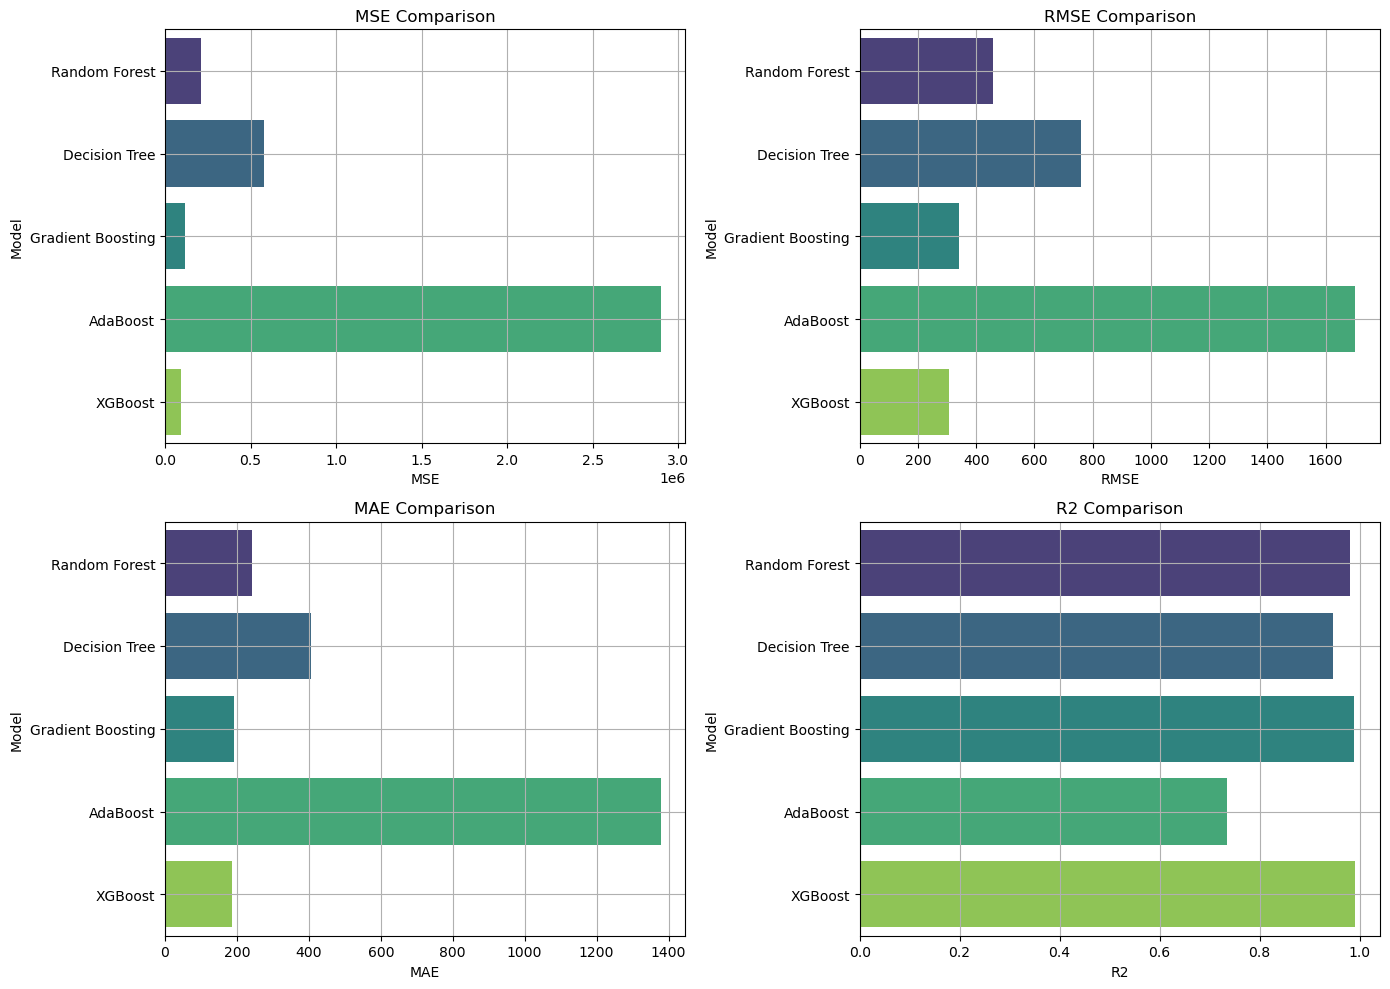

In [55]:
# Plot all metrics
plt.figure(figsize=(14, 10))
metrics = ['MSE', 'RMSE', 'MAE', 'R2']

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=metric, y='Model', data=df_results, palette='viridis', orient='h')
    plt.title(f'{metric} Comparison')
    plt.xlabel(metric)
    plt.ylabel('Model')
    plt.grid(True)

plt.tight_layout()
plt.show()


### Final Model Selection

After evaluating all the models based on four key metrics (MSE, RMSE, MAE, and R²), the **XGBoost** model shows the best overall performance:

- **Lowest Mean Squared Error (MSE)**: 94,829.28
- **Lowest Root Mean Squared Error (RMSE)**: 307.94
- **Lowest Mean Absolute Error (MAE)**: 184.98
- **Highest R-squared (R²)**: 0.9913

Therefore, **XGBoost** is selected as the final model for predicting US regional sales due to its high accuracy and low error rate.


## Deploying final model and preprocessing models

In [ ]:
import pickle
# pickle.dump(encoder,open('label_encoder.pkl','wb'))
# pickle.dump(scaler,open('scaler.pkl','wb'))
# pickle.dump(xgboost_model,open('xgboost_model.pkl','wb'))
